In [2]:
import pandas as pd

In [39]:
titanic = pd.read_csv('titanic_train.csv')
print(titanic.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [40]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())
print(titanic.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [41]:
titanic.loc[titanic['Sex'] == 'male', 'Sex'] = 0
titanic.loc[titanic['Sex'] == 'female', 'Sex'] = 1

In [8]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [10]:
titanic.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [13]:
titanic.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [42]:
titanic['Embarked'] = titanic['Embarked'].fillna('S')
titanic.loc[titanic['Embarked'] == 'S', 'Embarked'] = 0
titanic.loc[titanic['Embarked'] == 'C', 'Embarked'] = 1
titanic.loc[titanic['Embarked'] == 'Q', 'Embarked'] = 2

In [43]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import KFold
from sklearn.model_selection import train_test_split
import numpy as np

In [45]:
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
lg = LinearRegression()
kf = KFold(titanic.shape[0], n_folds=3, random_state=1)
predictions = []
for train,test in kf:
    train_datas = titanic[features].iloc[train,:]
    train_target = titanic['Survived'].iloc[train]
    lg.fit(train_datas, train_target)
    test_predictions = lg.predict(titanic[features].iloc[test,:])
    predictions.append(test_predictions)

In [46]:
predictions

[array([ 8.99877810e-02,  9.60756206e-01,  5.92676278e-01,  9.31138728e-01,
         5.29343071e-02,  1.70275685e-01,  3.69943590e-01,  1.03474847e-01,
         5.21597906e-01,  8.74491050e-01,  6.48883611e-01,  8.29742769e-01,
         1.34797198e-01, -1.61126844e-01,  6.58141307e-01,  6.39819748e-01,
         1.51733875e-01,  2.95432718e-01,  5.35377959e-01,  6.21007683e-01,
         2.61872592e-01,  2.62687561e-01,  7.31739160e-01,  5.05995897e-01,
         5.61398567e-01,  3.35039734e-01,  1.30338808e-01,  4.68765767e-01,
         6.60737753e-01,  9.10819218e-02,  4.77223920e-01,  1.04220026e+00,
         6.60691613e-01,  8.71539273e-02,  5.28550732e-01,  4.01874338e-01,
         1.30340307e-01,  1.29339672e-01,  5.72717129e-01,  6.65238822e-01,
         4.83215779e-01,  7.60807408e-01,  1.30578363e-01,  8.71867121e-01,
         7.09855487e-01,  9.11369897e-02,  1.39181745e-01,  6.60691613e-01,
         6.82833485e-02,  6.06254374e-01,  4.92254383e-02,  1.29250392e-01,
         9.0

In [20]:
predictions[predictions>0.5]

TypeError: unorderable types: list() > float()

In [47]:
predictions = np.concatenate(predictions, axis=0)

In [48]:
predictions[predictions > 0.5] = 1
predictions[predictions <= 0.5] = 0

In [35]:
predictions

array([0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0.

In [37]:
titanic['Survived']

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    0
864    0
865    1
866    1
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [72]:
accuracy = len(predictions[predictions == titanic['Survived']])/len(predictions)
print(accuracy)

0.8215488215488216


In [50]:
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression

In [51]:
alg = LogisticRegression(random_state=1)
scores = cross_val_score(alg, titanic[features], titanic['Survived'], cv=3)
print(scores.mean())

0.7878787878787877


In [53]:
titanic_test = pd.read_csv("test.csv")
titanic_test["Age"] = titanic_test["Age"].fillna(titanic["Age"].median())
titanic_test["Fare"] = titanic_test["Fare"].fillna(titanic_test["Fare"].median())
titanic_test.loc[titanic_test["Sex"] == "male", "Sex"] = 0 
titanic_test.loc[titanic_test["Sex"] == "female", "Sex"] = 1
titanic_test["Embarked"] = titanic_test["Embarked"].fillna("S")
titanic_test.loc[titanic_test["Embarked"] == "S", "Embarked"] = 0
titanic_test.loc[titanic_test["Embarked"] == "C", "Embarked"] = 1
titanic_test.loc[titanic_test["Embarked"] == "Q", "Embarked"] = 2

In [54]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0


In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
alg = RandomForestClassifier(random_state=1, n_estimators=10, min_samples_split=2,min_samples_leaf=1)
kf = KFold(titanic.shape[0], 3, random_state=1)
scores = cross_val_score(alg, titanic[features], titanic['Survived'], cv=kf)
print(scores.mean())

0.7856341189674523


In [57]:
alg = RandomForestClassifier(random_state=1, n_estimators=50, min_samples_split=4,min_samples_leaf=2)
kf = KFold(titanic.shape[0], 3, random_state=1)
scores = cross_val_score(alg, titanic[features], titanic['Survived'], cv=kf)
print(scores.mean())

0.8159371492704826


In [58]:
alg = RandomForestClassifier(random_state=1, n_estimators=100, min_samples_split=8,min_samples_leaf=4)
kf = KFold(titanic.shape[0], 3, random_state=1)
scores = cross_val_score(alg, titanic[features], titanic['Survived'], cv=kf)
print(scores.mean())

0.8181818181818182


In [59]:
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch']
titanic['NameLength'] = titanic['Name'].apply(lambda x: len(x))

In [60]:
import re

def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ''

titles = titanic['Name'].apply(get_title)
print(pd.value_counts(titles))

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Sir           1
Mme           1
Ms            1
Don           1
Capt          1
Lady          1
Jonkheer      1
Countess      1
Name: Name, dtype: int64


In [61]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle": 8, "Mme": 8, "Don": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2}
for k,v in title_mapping.items():
    titles[titles==k] = v
print(pd.value_counts(titles))

1     517
2     183
3     125
4      40
5       7
6       6
7       5
10      3
8       3
9       2
Name: Name, dtype: int64


In [62]:
titanic['Title'] = titles

In [63]:
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt

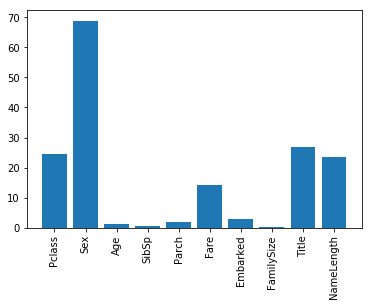

In [64]:
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "FamilySize", "Title", "NameLength"]
selector = SelectKBest(f_classif, k=5)
selector.fit(titanic[features], titanic['Survived'])
scores = -np.log10(selector.pvalues_)
plt.bar(range(len(features)), scores)
plt.xticks(range(len(features)), features, rotation='vertical')
plt.show()

In [65]:
features = ["Pclass", "Sex", "Fare", "Title"]
alg = RandomForestClassifier(random_state=1, n_estimators=100, min_samples_split=8, min_samples_leaf=4)

In [71]:
from sklearn.ensemble import GradientBoostingClassifier
algorithms = [
    [GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=3), ["Pclass", "Sex", "Age", "Fare", "Embarked", "FamilySize", "Title",]],
    [LogisticRegression(random_state=1), ["Pclass", "Sex", "Fare", "FamilySize", "Title", "Age", "Embarked"]]
]
kf = KFold(titanic.shape[0], n_folds=3, random_state=1)

predictions = []
for train,test in kf:
    train_target = titanic['Survived'].iloc[train]
    full_test_predictions = []
    for alg, predictors in algorithms:
        alg.fit(titanic[predictors].iloc[train,:], train_target)
        test_predictions = alg.predict_proba(titanic[predictors].iloc[test,:].astype(float))[:,1]
        full_test_predictions.append(test_predictions)
    test_predictions = (full_test_predictions[0] + full_test_predictions[1]) / 2
    # Any value over .5 is assumed to be a 1 prediction, and below .5 is a 0 prediction.
    test_predictions[test_predictions <= .5] = 0
    test_predictions[test_predictions > .5] = 1
    predictions.append(test_predictions)

predictions = np.concatenate(predictions, axis=0)
accuracy = len(predictions[predictions == titanic["Survived"]]) / len(predictions)
print(accuracy)

0.8215488215488216


In [68]:
len(predictions)

891